<a href="https://colab.research.google.com/github/jmadao/POS_DSA_PUC_RJ/blob/main/MVP_I_Jo%C3%A3o_Ad%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPRINT I - MVP - João Marco Adão Ananias

## Definição do Problema

Neste final de ano, uma notícia chocou muitas pessoas: "Black Friday tem desempenho fraco em 2023, apontam dados de vendas".

Aproveitando o tema, foi encontrado um dataset contendo vendas durante a Black Friday de uma empresa "ABC" em um determinado ano.

Link do DataSet: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda/

Nosso objetivo neste projeto, será entender melhor o comportamento do consumidor e tentar entender quais variáveis possuem uma maior correlação / relevância no valor gasto.

Esta análise, pode ajudar a empresa "ABC" a direcionar melhor suas estratégias durante o período promocional ou até em outros eventos.

Abaixo seguem algumas informações sobre os atributos do DataSet:

*   **User_ID** -> ID único do Cliente
*   **Product_ID** -> ID do Produto
*   **Gender** -> Gênero
*   **Age** -> Idade
*   **Occupation** -> Profissão (Máscara)
*   **City_Category** -> Categoria da Cidade
*   **Stay_In_Current_City_Years** -> Anos em que o clinte está na cidade
*   **Marital_Status** -> Estado Civil
*   **Product_Category_1** -> Categoria do Produto 1 (Máscara)
*   **Product_Category_2** -> Categoria do Produto 2 (Máscara)
*   **Product_Category_3** -> Categoria do Produto 3 (Máscara)
*   **Purchase** -> Valor de Compra (Target)


Podemos ver que, em nosso dataset, temos a coluna "Purchase", que seria nosso Target. Dessa forma, podemos afirmar que temos em nossas mãos um problema de aprendizado supervisionado.

Antes de entrar em nossa análise, há algumas hipóteses que será interessante validarmos ou não. São elas:

1) Clientes com mais idade, gastam mais?

2) Clientes de Cidades de Categoria "A", gastam mais?

3) Há diferença no comportamento de compra por conta do gênero?

4) Há diferença no comportamento de compra por conta do Estado Civil?

Essas são apenas algumas perguntas que serão interessantes analisarmos a partir de nossa EDA.

--------------------------------------------------------------------------

PONTO DE ATENÇÃO PARA O DATASET: UM CLIENTE PODE COMPRAR MAIS DE UM PRODUTO, OU SEJA, UM CLIENTE PODE ESTAR PRESENTE EM MAIS DE UMA LINHA



## Importando Bibliotecas

In [50]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib.ticker import FuncFormatter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## Carga do DataSet

A base foi salva em meu repositório do GitHub

In [51]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jmadao/POS_DSA_PUC_RJ/main/BF_Sales.csv"

# Lê o arquivo
df_bf = pd.read_csv(url, delimiter=',')

## Análise Inicial e Tratamento de Dados

Nesta etapa, iremos fazer uma análise sobre a estrutura de nosso dataset e fazer alguns tratamentos simples, como alteração de nome das colunas, tratamento de valores vazios, etc.

In [52]:
# Exibindo as primeiras linhas do DataFrame

df_bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [53]:
# Exibindo as últimas linhas do DataFrame

df_bf.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


---
Observando nosso DataFrame, podemos ver que a coluna Purchase veio sem o separador do decimal, sendo necessário realizarmos uma divisão por 100.

In [54]:
df_bf['Purchase'] = df_bf['Purchase'] / 100

In [55]:
df_bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,3.68
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,3.71
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,1.37
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,3.65


In [56]:
# Alterando Nome de Colunas de nosso DataFrame

nome_colunas = ['ID_Cliente', 'ID_Produto', 'Gênero', 'Faixa Etária', 'Ocupação', 'Categoria da Cidade', 'Anos na Cidade', 'Estado Civil', 'Categoria do Produto 1', 'Categoria do Produto 2', 'Categoria do Produto 3', 'Valor Compra']

df_bf.columns = nome_colunas

In [57]:
# Verificando as Dimensões do DataFrame

df_bf.shape

(550068, 12)

In [58]:
# Verificando as informações do DataFrame

df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Cliente              550068 non-null  int64  
 1   ID_Produto              550068 non-null  object 
 2   Gênero                  550068 non-null  object 
 3   Faixa Etária            550068 non-null  object 
 4   Ocupação                550068 non-null  int64  
 5   Categoria da Cidade     550068 non-null  object 
 6   Anos na Cidade          550068 non-null  object 
 7   Estado Civil            550068 non-null  int64  
 8   Categoria do Produto 1  550068 non-null  int64  
 9   Categoria do Produto 2  376430 non-null  float64
 10  Categoria do Produto 3  166821 non-null  float64
 11  Valor Compra            550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 50.4+ MB


In [59]:
# Fazendo resumo estatístico do DataFrame

df_bf.describe()

,ID_Cliente,Ocupação,Estado Civil,Categoria do Produto 1,Categoria do Produto 2,Categoria do Produto 3,Valor Compra
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,92.639687
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,50.230654
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,0.120000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,58.230000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,80.470000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,120.540000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,239.610000


Neste caso, esse resumo estatístico não se aplica muito bem ao nosso dataframe, uma vez que muitas colunas são categóricas, exceto pela coluna "Valor Compra", onde já conseguimos ter uma dimensão da média do gasto dos clientes analisados.

---

Vamos então analisar alguma das variáveis categóricas sobre os clientes:

In [60]:
# Verificando Distribuição da Base por Gênero

df_bf.groupby(['Gênero'])['ID_Cliente'].nunique()

Gênero
F    1666
M    4225
Name: ID_Cliente, dtype: int64

Podemos notar que temos um desbalanceamento em nossa base, onde maior parte de nossos clientes são do sexo M (Masculino)

---

In [61]:
# Verificando Distribuição da Base por Faixa Etária

df_bf.groupby(['Faixa Etária'])['ID_Cliente'].nunique()

Faixa Etária
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: ID_Cliente, dtype: int64

Em relação a Faixa Etária, nossa base tem predominantemente clientes entre 26-35 anos.

---

In [62]:
# Verificando Distribuição da Base por Faixa Etária

df_bf.groupby(['Anos na Cidade'])['ID_Cliente'].nunique()

Anos na Cidade
0      772
1     2086
2     1145
3      979
4+     909
Name: ID_Cliente, dtype: int64

A maioria de nossos clientes estão entre 1 e 2 anos na cidade.

---

In [63]:
# Verificando Distribuição da Base por Faixa Etária

df_bf.groupby(['Categoria da Cidade'])['ID_Cliente'].nunique()

Categoria da Cidade
A    1045
B    1707
C    3139
Name: ID_Cliente, dtype: int64

A maioria dos clientes residem em cidade de categoria "C"

---

Agora vamos analisar se em nosso DataFrame temos valores vazios, para então, tratá-los.


In [64]:
# verificando nulls no dataset
df_bf.isnull().sum()

ID_Cliente                     0
ID_Produto                     0
Gênero                         0
Faixa Etária                   0
Ocupação                       0
Categoria da Cidade            0
Anos na Cidade                 0
Estado Civil                   0
Categoria do Produto 1         0
Categoria do Produto 2    173638
Categoria do Produto 3    383247
Valor Compra                   0
dtype: int64

<Axes: >

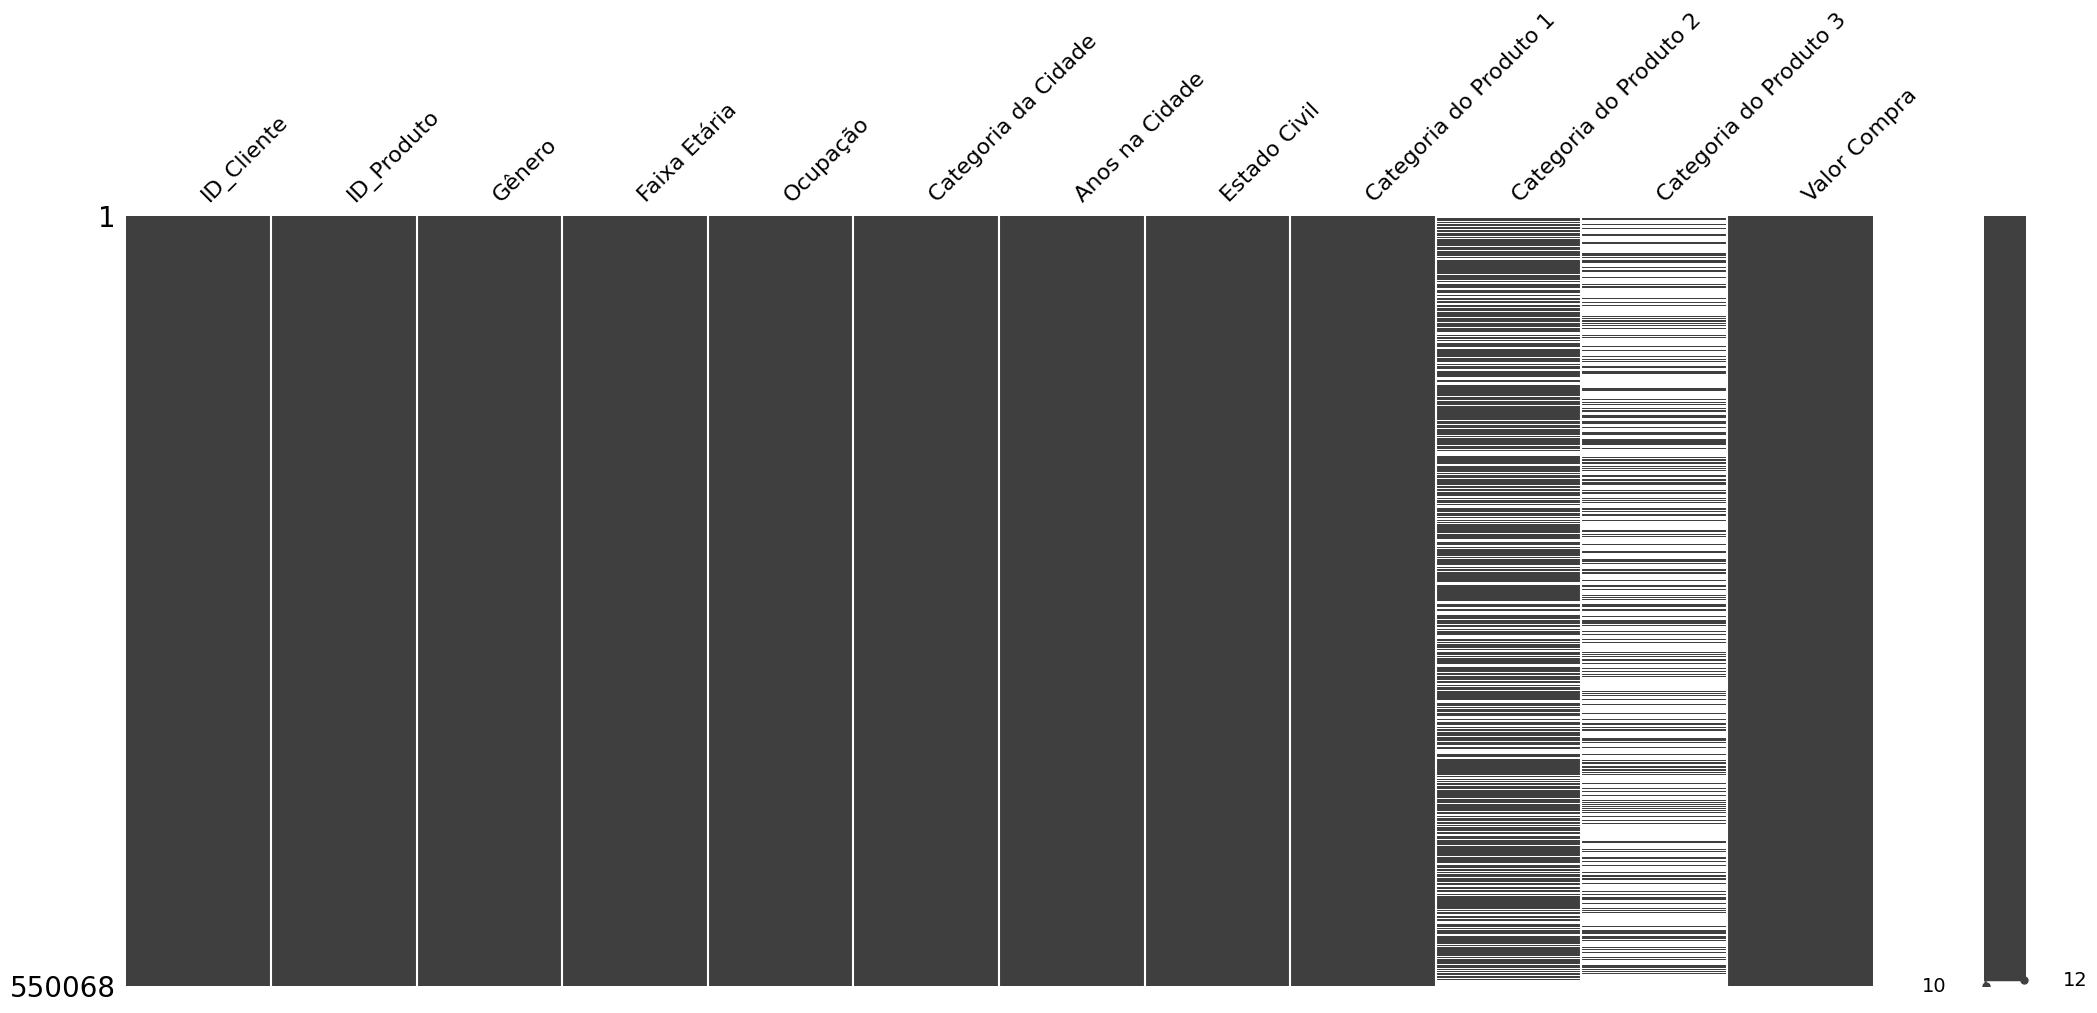

In [65]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df_bf.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_bf_sm = df_bf[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_bf_sm)

Podemos ver que temos diversas linhas das colunas "Categoria do Produto 2" e "Categoria do Produto 3" vazias. Algumas possíveis transformações que podemos fazer com estas colunas:

1) Remover as colunas e não utilizá-las adiante;

2) Remover as linhas em que os valores são nulos;

3) Substituir os valores vazios por "0" (Como se fosse uma Categoria "Não Informada");

4) Utilizar a Moda da Coluna no lugar dos vazios;


Destes pontos, o que mais se enquadra neste nosso problema seria a opção 3, onde estaríamos criando uma "nova categoria" 0, que seria o "Não informado".

Vejamos abaixo:

In [66]:
# Substituindo Vazios por 0

df_bf_sm['Categoria do Produto 2'].fillna(0, inplace=True)

df_bf_sm['Categoria do Produto 3'].fillna(0, inplace=True)

<Axes: >

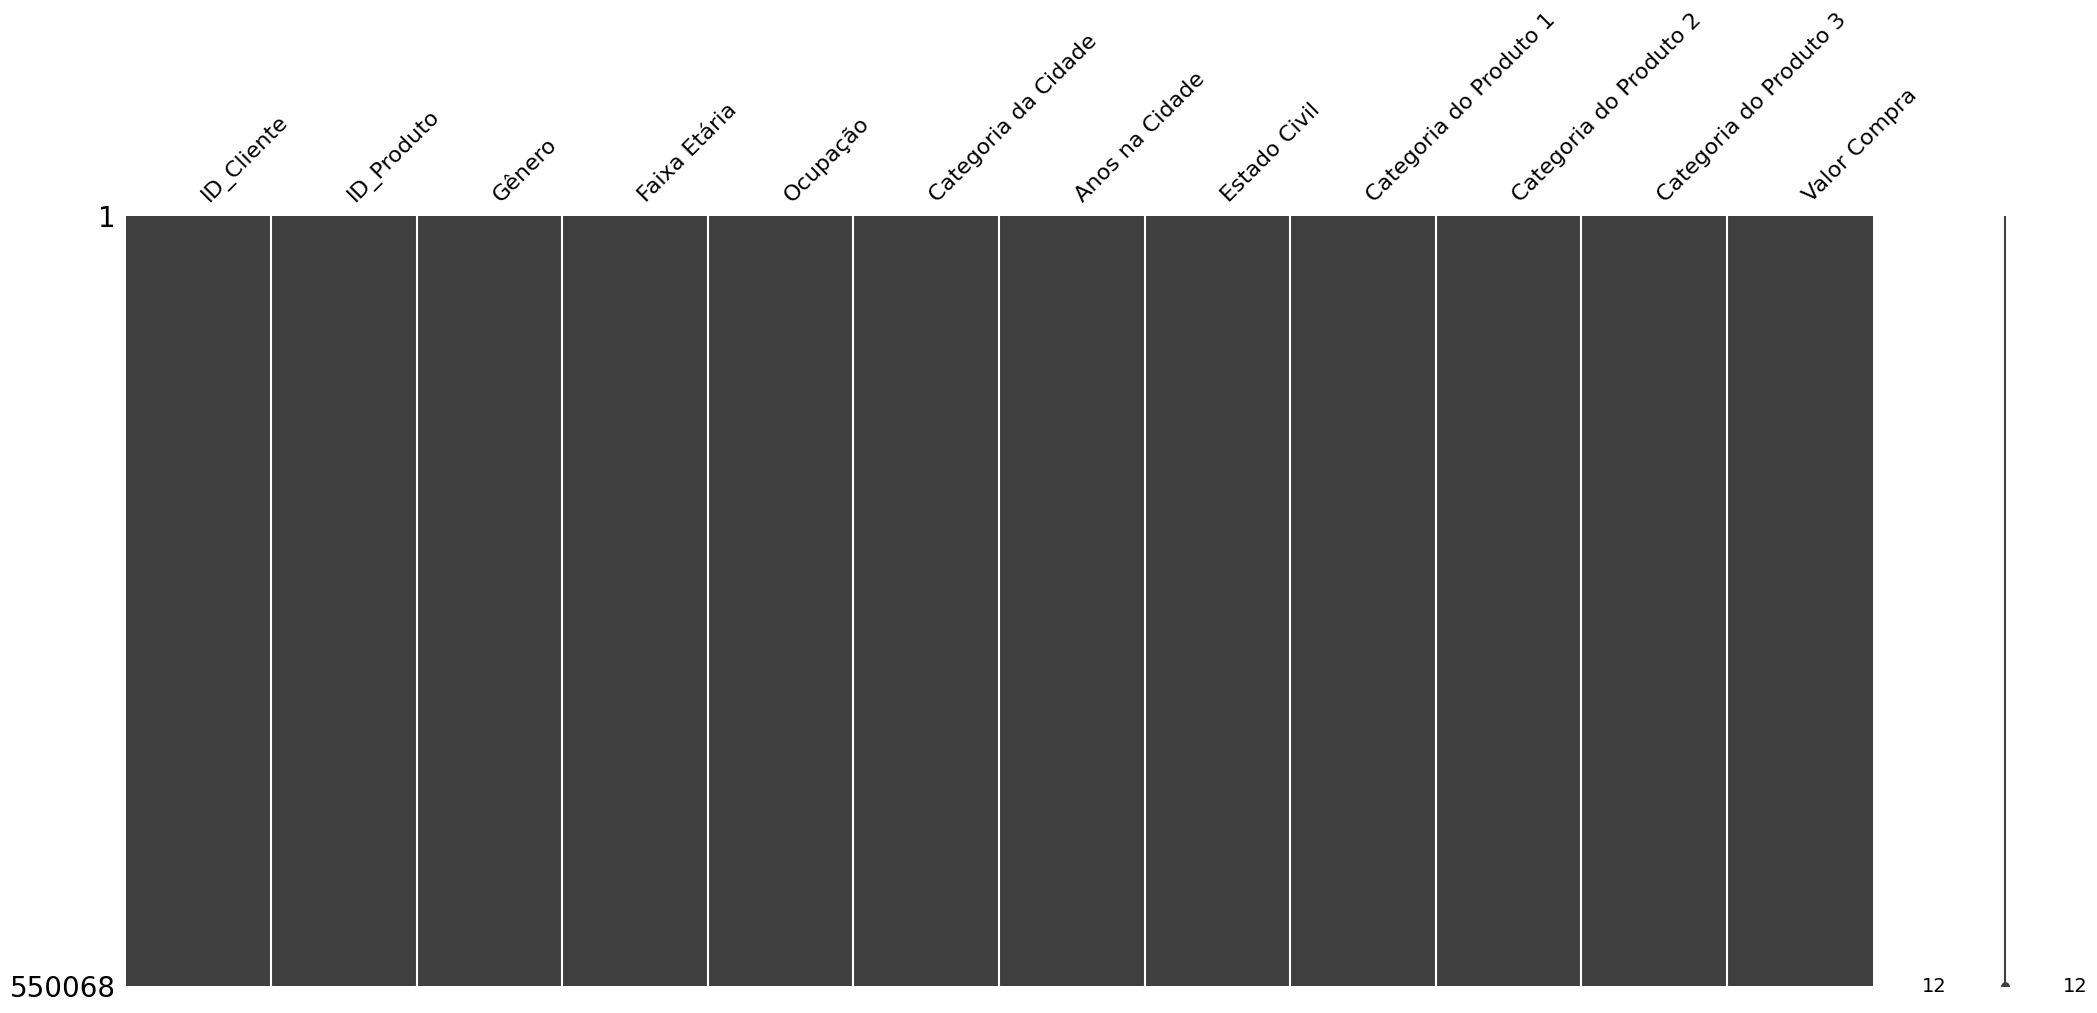

In [67]:
ms.matrix(df_bf_sm)

Após o passo acima, podemos verificar que nosso DataFrame não possui mais dados nulos.

---

Antes de partirmos pra nossa EDA e construir nossas visualizações, vamos replicar algumas colunas que são categóricas para Numérico, o que vai nos ajudar a realizar possíveis análises de correlação mais adiante.

Criando nova coluna de Faixa Etária:

In [68]:
# Função para transformar faixas etárias em números
def faixa_etaria_para_numero(faixa_etaria):
    # Verificar se contém "-" ou "+", extrair o primeiro número
    if '-' in faixa_etaria:
        return int(faixa_etaria.split('-')[0])
    elif '+' in faixa_etaria:
        return int(faixa_etaria.split('+')[0])
    else:
        # Se não contiver nenhum separador, converter diretamente para número
        return int(faixa_etaria)

In [69]:
# Aplicar a função à coluna 'Faixa Etária'
df_bf_sm['Faixa Etária - Numerico'] = df_bf_sm['Faixa Etária'].apply(faixa_etaria_para_numero)

---

Criando nova coluna de Categoria da Cidade:

In [70]:
# Mapear as categorias de cidades para números
mapeamento_cidades = {'A': 3, 'B': 2, 'C': 1}

# Aplicar o mapeamento à coluna 'Cidade'
df_bf_sm['Categoria da Cidade - Numerico'] = df_bf_sm['Categoria da Cidade'].map(mapeamento_cidades)

---

Criando nova coluna de Anos na Cidade:

In [71]:
df_bf_sm['Anos na Cidade - Numerico'] = df_bf_sm['Anos na Cidade'].str.replace('+', '').astype(int)

---

Após criar as novas colunas, vamos analisar rapidamente como ficou nosso DataFrame, para em seguida iniciar nossa EDA

In [72]:
df_bf_sm.describe()

,ID_Cliente,Ocupação,Estado Civil,Categoria do Produto 1,Categoria do Produto 2,Categoria do Produto 3,Valor Compra,Faixa Etária - Numerico,Categoria da Cidade - Numerico,Anos na Cidade - Numerico
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,92.639687,30.381929,1.957360,1.858418
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,50.230654,11.866333,0.760211,1.289443
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.120000,0.000000,1.000000,0.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,58.230000,26.000000,1.000000,1.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,80.470000,26.000000,2.000000,2.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,120.540000,36.000000,3.000000,3.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,239.610000,55.000000,3.000000,4.000000


In [73]:
df_bf_sm.head()

,ID_Cliente,ID_Produto,Gênero,Faixa Etária,Ocupação,Categoria da Cidade,Anos na Cidade,Estado Civil,Categoria do Produto 1,Categoria do Produto 2,Categoria do Produto 3,Valor Compra,Faixa Etária - Numerico,Categoria da Cidade - Numerico,Anos na Cidade - Numerico
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,83.70,0,3,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00,0,3,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,14.22,0,3,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,10.57,0,3,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,79.69,55,1,4


## Análise Exploratória de Dados e Construção de Visualizações

Inicialmente, vamos explorar um pouco melhor nossa base de clientes. Como em nossa base original, o cliente se repete diversas vezes por conta do Produto, vamos criar um novo DataFrame para nos ajudar, retirando produto e categoria e realizando o agrupamento das demais variáveis.

In [74]:
# Criando DataFrame fazendo Agrupamento - Para analisar clientes

df_bf_sm_agrupado = df_bf_sm.groupby(['ID_Cliente', 'Gênero', 'Faixa Etária', 'Ocupação', 'Categoria da Cidade', 'Anos na Cidade', 'Estado Civil', 'Faixa Etária - Numerico', 'Categoria da Cidade - Numerico', 'Anos na Cidade - Numerico']).agg({
    'ID_Produto': 'nunique',
    'Categoria do Produto 1': 'nunique',
    'Valor Compra' : 'sum'
}).reset_index()

In [75]:
# Renomeando Colunas

df_bf_sm_agrupado.columns = ['ID_Cliente', 'Gênero', 'Faixa Etária', 'Ocupação', 'Categoria da Cidade', 'Anos na Cidade', 'Estado Civil', 'Faixa Etária - Numerico', 'Categoria da Cidade - Numerico', 'Anos na Cidade - Numerico', 'Qtd Produtos Distintos', 'Qtd Categorias Distintas', 'Valor Gasto']

In [76]:
# Apresentando Primeiras linhas do Df

df_bf_sm_agrupado.head()

,ID_Cliente,Gênero,Faixa Etária,Ocupação,Categoria da Cidade,Anos na Cidade,Estado Civil,Faixa Etária - Numerico,Categoria da Cidade - Numerico,Anos na Cidade - Numerico,Qtd Produtos Distintos,Qtd Categorias Distintas,Valor Gasto
0,1000001,F,0-17,10,A,2,0,0,3,2,35,11,3340.93
1,1000002,M,55+,16,C,4+,0,55,1,4,77,6,8104.72
2,1000003,M,26-35,15,A,3,0,26,3,3,29,6,3416.35
3,1000004,M,46-50,7,B,2,1,46,2,2,14,2,2064.68
4,1000005,M,26-35,20,A,1,1,26,3,1,106,12,8210.01


In [77]:
# Apresentando resumo estatístico

df_bf_sm_agrupado.describe()

,ID_Cliente,Ocupação,Estado Civil,Faixa Etária - Numerico,Categoria da Cidade - Numerico,Anos na Cidade - Numerico,Qtd Produtos Distintos,Qtd Categorias Distintas,Valor Gasto
count,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,1.003025e+06,8.153285,0.419963,31.242404,1.644543,1.858598,93.374300,9.638771,8650.165918
std,1.743379e+03,6.323140,0.493594,13.006854,0.764189,1.281394,107.190049,3.595397,9436.445397
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,466.810000
25%,1.001518e+06,3.000000,0.000000,26.000000,1.000000,1.000000,26.000000,7.000000,2376.780000
50%,1.003026e+06,7.000000,0.000000,26.000000,1.000000,2.000000,54.000000,9.000000,5212.130000
75%,1.004532e+06,14.000000,1.000000,36.000000,2.000000,3.000000,117.000000,12.000000,11192.495000
max,1.006040e+06,20.000000,1.000000,55.000000,3.000000,4.000000,1026.000000,19.000000,105369.090000


---

A partir de agora, vamos iniciar a construção de alguns gráficos para nos ajudar com a análise e visualização dos dados.

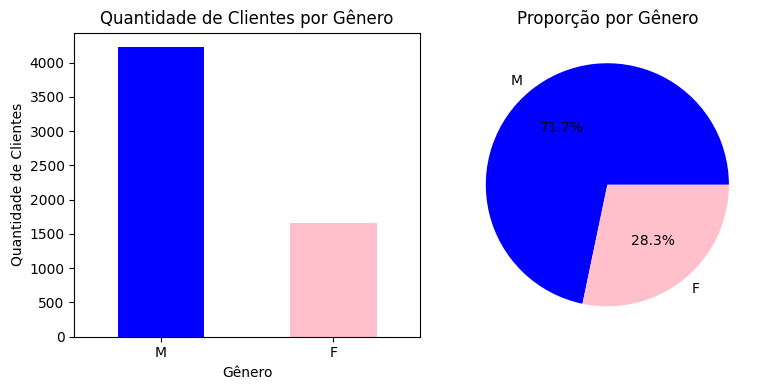

In [78]:
# Contando clientes por gênero
cont_genero = df_bf_sm_agrupado['Gênero'].value_counts()

# Criando layout para gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plotar um gráfico de barras
cont_genero.plot(kind='bar', color=['blue', 'pink'], ax=ax1, rot=0)
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_title('Quantidade de Clientes por Gênero')

# Plotar o gráfico de pizza
df_bf_sm_agrupado['Gênero'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], ax=ax2)
ax2.set_ylabel('')  # Remover rótulo do eixo y
ax2.set_title('Proporção por Gênero')

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

O gráfico acima nos mostra que quase 3/4 dos clientes são homens e apenas 28,3% são mulheres, mostrando uma predominancia no consumo dos homens durante a Black Friday.

---------------------------------------------------------------

Abaixo vamos analisar utilizando outros dados categóricos

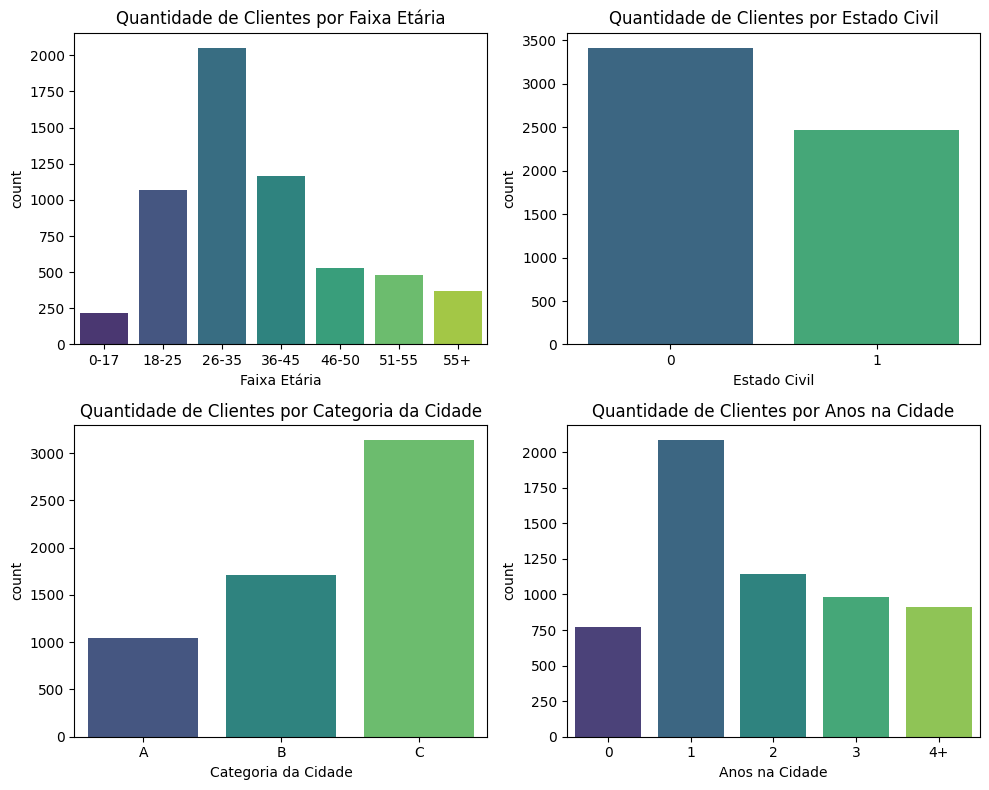

In [79]:
# Criar uma grade de subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

ordem_faixa_etaria = sorted(df_bf_sm_agrupado['Faixa Etária'].unique(), reverse=False)
ordem_categoria_cidade= sorted(df_bf_sm_agrupado['Categoria da Cidade'].unique(), reverse=False)
ordem_Anos_cidade= sorted(df_bf_sm_agrupado['Anos na Cidade'].unique(), reverse=False)

# Subplot 1: Contagem de Clientes por Faixa Etária
sns.countplot(x='Faixa Etária', data=df_bf_sm_agrupado, ax=axs[0, 0], palette='viridis', order=ordem_faixa_etaria)
axs[0, 0].set_title('Quantidade de Clientes por Faixa Etária')

# Subplot 2: Contagem de Clientes por Estado Civil
sns.countplot(x='Estado Civil', data=df_bf_sm_agrupado, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Quantidade de Clientes por Estado Civil')

# Subplot 3: Contagem de Clientes por Categoria da Cidade
sns.countplot(x='Categoria da Cidade', data=df_bf_sm_agrupado, ax=axs[1, 0], palette='viridis', order=ordem_categoria_cidade)
axs[1, 0].set_title('Quantidade de Clientes por Categoria da Cidade')

# Subplot 4: Contagem de Clientes por Anos na Cidade
sns.countplot(x='Anos na Cidade', data=df_bf_sm_agrupado, ax=axs[1, 1], palette='viridis', order=ordem_Anos_cidade)
axs[1, 1].set_title('Quantidade de Clientes por Anos na Cidade')

# Ajustar o layout
plt.tight_layout()
plt.show()

Complementando com estes 4 gráficos, em que percebemos que a maioria dos clientes possuem entre 26-35 anos, são solteiros, vivem em cidade de Categoria C e estão há 1 ano na cidade, conseguimos traçar um perfil principal de nossos cliente:

Homens, com idade entre 26-35 anos, Solteiros, que moram há 1 ano em Cidade de Categoria C.

------------------------------------------------------------------------

Após analisar o perfil de nossos clientes, vamos realizar a análise sob as mesmas pespectivas, porém sobre o valor gasto.

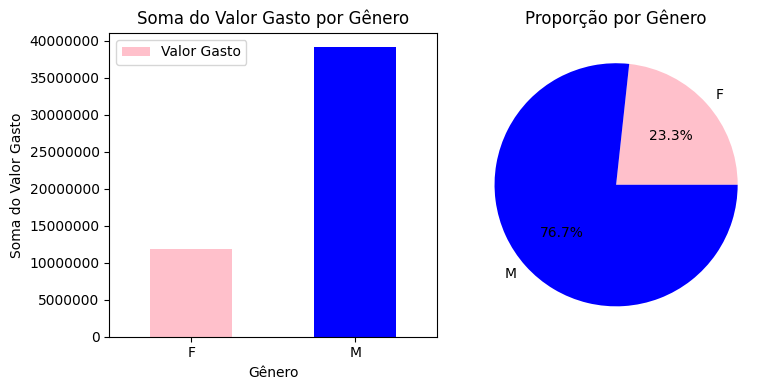

In [80]:
# Agrupar por gênero e calcular a soma do valor gasto
df_agrupado = df_bf_sm_agrupado.groupby('Gênero')['Valor Gasto'].sum().reset_index()

# Criar layout para gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plotar um gráfico de barras
df_agrupado.plot(kind='bar', x='Gênero', y='Valor Gasto', color=['pink', 'blue'], ax=ax1, rot=0)
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Soma do Valor Gasto')
ax1.set_title('Soma do Valor Gasto por Gênero')

# Formatar o eixo y sem notação científica
ax1.ticklabel_format(style='plain', axis='y')

# Plotar o gráfico de pizza
df_agrupado.set_index('Gênero')['Valor Gasto'].plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'], ax=ax2)
ax2.set_ylabel('')  # Remover rótulo do eixo y
ax2.set_title('Proporção por Gênero')

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

Podemos notar que, os clientes do sexo Masculino se destacam ainda mais em relação ao valor gasto, mostrando que, os homens tem um Ticket Médio maior que as Mulheres.

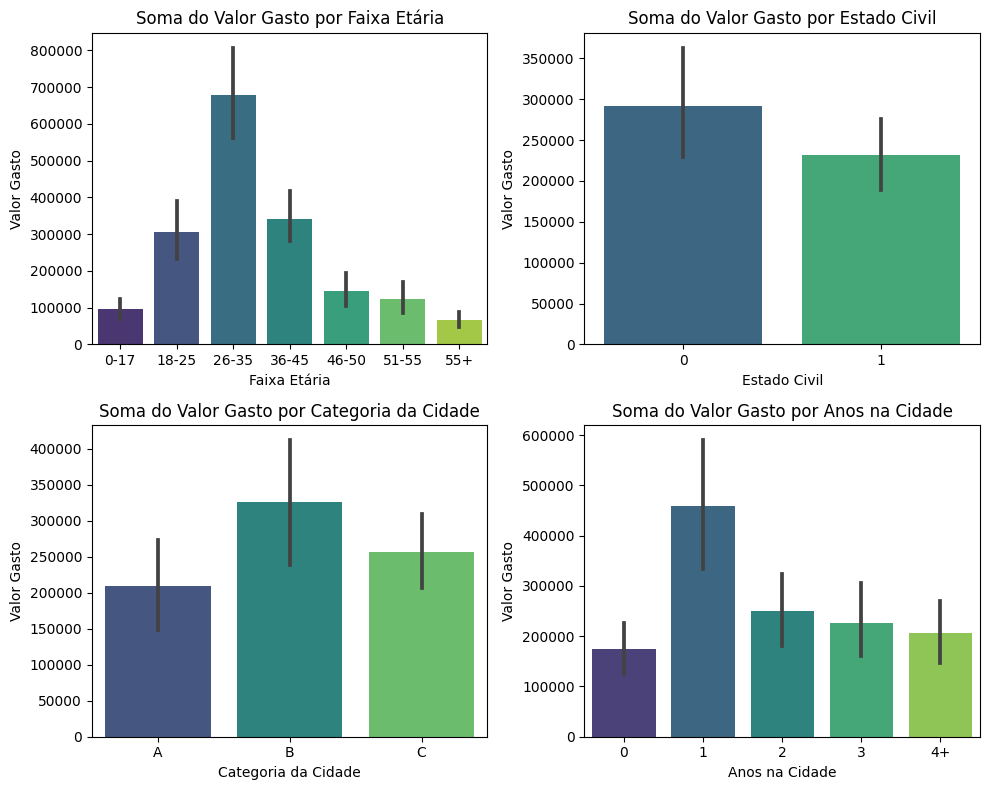

In [81]:
# Agrupar por faixa etária, estado civil, categoria da cidade e anos na cidade
df_agrupado = df_bf_sm_agrupado.groupby(['Faixa Etária', 'Estado Civil', 'Categoria da Cidade', 'Anos na Cidade'])['Valor Gasto'].sum().reset_index()

# Criar uma grade de subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

ordem_faixa_etaria = sorted(df_agrupado['Faixa Etária'].unique(), reverse=False)
ordem_categoria_cidade = sorted(df_agrupado['Categoria da Cidade'].unique(), reverse=False)
ordem_Anos_cidade = sorted(df_agrupado['Anos na Cidade'].unique(), reverse=False)

# Subplot 1: Soma do Valor Gasto por Faixa Etária
sns.barplot(x='Faixa Etária', y='Valor Gasto', data=df_agrupado, ax=axs[0, 0], palette='viridis', order=ordem_faixa_etaria)
axs[0, 0].set_title('Soma do Valor Gasto por Faixa Etária')

# Subplot 2: Soma do Valor Gasto por Estado Civil
sns.barplot(x='Estado Civil', y='Valor Gasto', data=df_agrupado, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Soma do Valor Gasto por Estado Civil')

# Subplot 3: Soma do Valor Gasto por Categoria da Cidade
sns.barplot(x='Categoria da Cidade', y='Valor Gasto', data=df_agrupado, ax=axs[1, 0], palette='viridis', order=ordem_categoria_cidade)
axs[1, 0].set_title('Soma do Valor Gasto por Categoria da Cidade')

# Subplot 4: Soma do Valor Gasto por Anos na Cidade
sns.barplot(x='Anos na Cidade', y='Valor Gasto', data=df_agrupado, ax=axs[1, 1], palette='viridis', order=ordem_Anos_cidade)
axs[1, 1].set_title('Soma do Valor Gasto por Anos na Cidade')

# Ajustar o layout
plt.tight_layout()
plt.show()

Analisando o gráfico acima, podemos notar que o comportamento é bem parecido com o de quantidade de clientes, com exceção da "Soma do Valor Gasto por Categoria da Cidade", em que clientes que residem em Cidades de Categoria B, são os clientes que mais gastaram na Black Friday.

---

Agora vamos analisar a distribuição de nossos clientes em relação as variáveis "Quantidade de Produtos", "Quantidade de Categorias" e "Valor Gasto", para entender um pouco o perfil de consumo deles.

In [82]:
# Sepaparando Variáveis pela qual analisaremos o Histograma

df_bf_sm_agrupado_hist = df_bf_sm_agrupado[['Valor Gasto', 'Qtd Produtos Distintos', 'Qtd Categorias Distintas']]

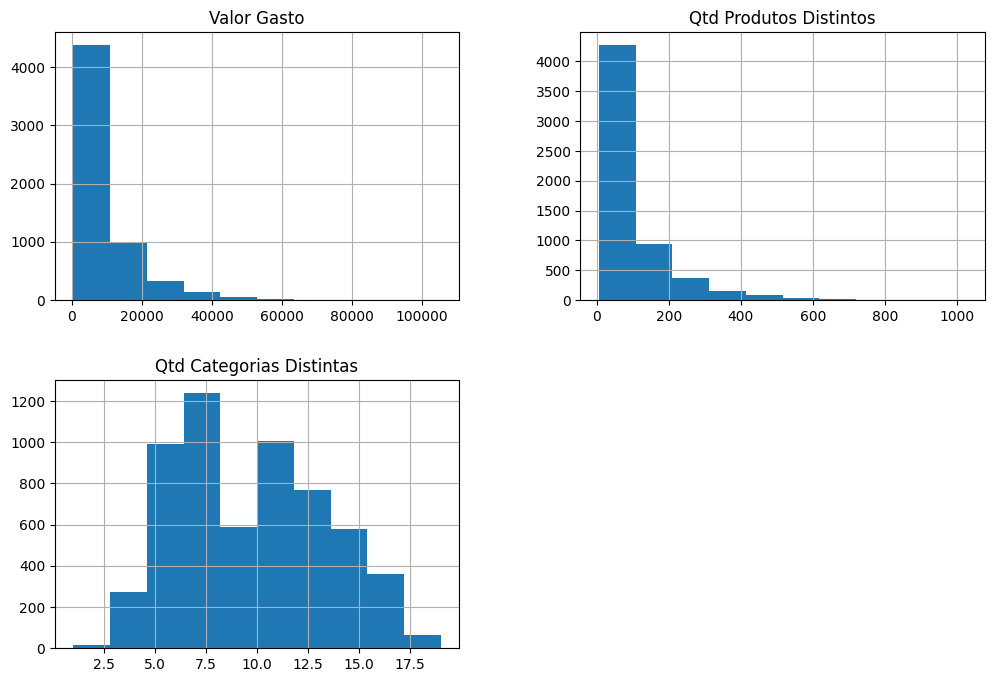

In [83]:
# Histograma

df_bf_sm_agrupado_hist.hist(figsize = (12,8))
plt.show()

Analisando o Histograma acima, podemos notar que em relação a "Valor Gasto" e "Qtd Produtos Distintos" temos uma grande assimetria, onde a maior parte dos clientes estão concentrados a esquerda (Menos Valor Gasto e Menos problemas distintos), formando uma longa cauda a direita.

Já em relação a "Qtd Categorias Distintas", temos uma distribuição que parece ser bimodal, onde tem 2 picos de clientes, entre aproximadamente 7 categorias e 11 categorias.

---

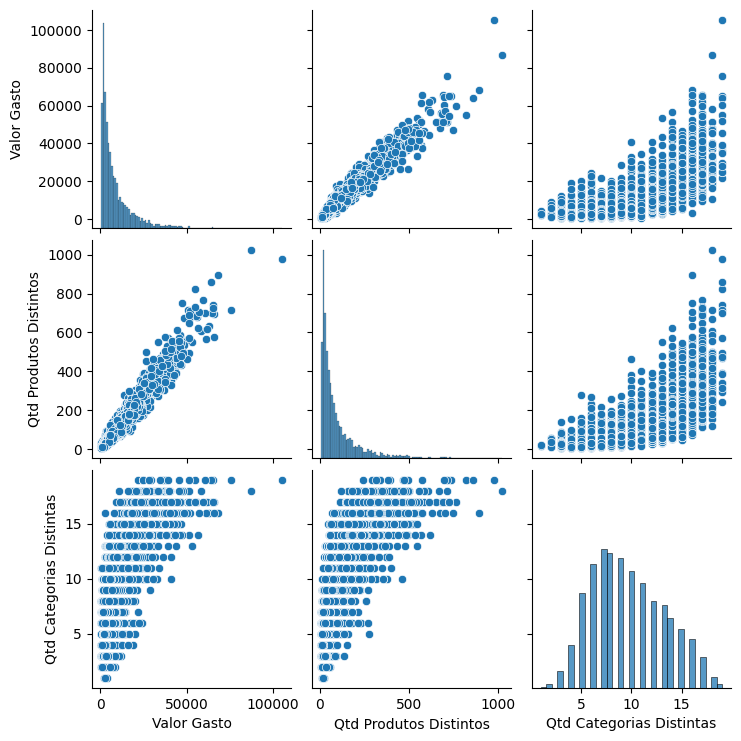

In [84]:
# Criando pairplot

sns.pairplot(df_bf_sm_agrupado_hist)

Analisando o pairplot, podemos ver que 2 variáveis são altamente correlacionadas: Qtd Produtos Distintos e Valor Gasto.

Ou seja, quanto mais produtos o cliente compra, mais ele gasta.

Isso mostra a importância do poder de venda das empresas.

---

Agora vamos criar gráficos de boxplot, para analisar os dados excluindo outliers

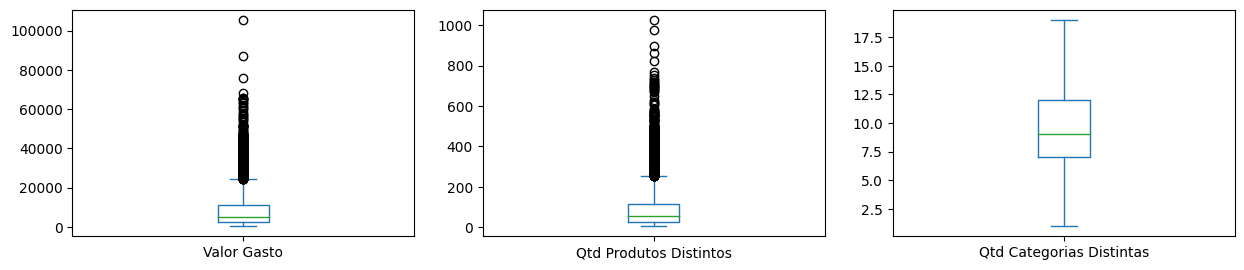

In [85]:
# Criando gráficos bloxplots

df_bf_sm_agrupado_hist.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))

plt.show()

Podemos notar que as variáveis "Valor Gasto" e "Qtd Produtos Distintos" possuem diversos outliers, acima do intervarlo interquartil. Uma boa transformação para podermos criar nosso modelo de ML seria excluir esses clientes "Outliers"

---

Agora vamos verificar a correlação entre os atributos numéricos do dataset

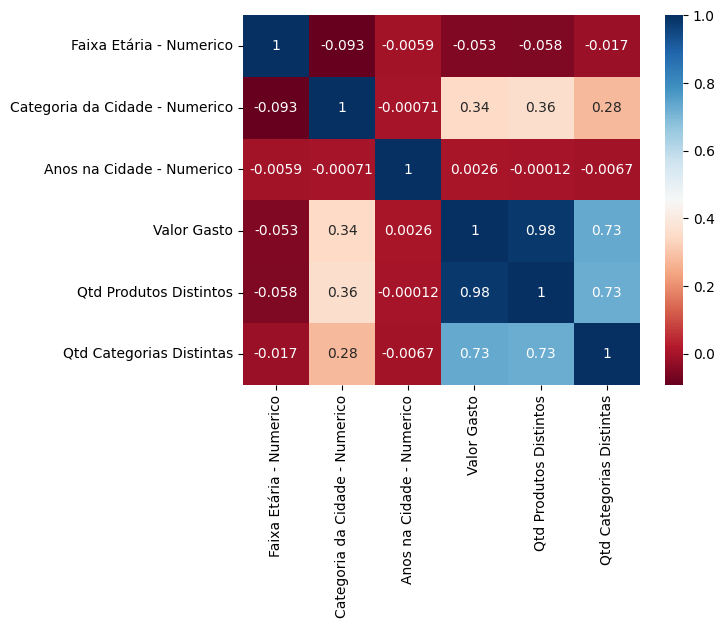

In [86]:
# Separando colunas que iremos correlacionar

df_correlacao = df_bf_sm_agrupado[['Faixa Etária - Numerico', 'Categoria da Cidade - Numerico', 'Anos na Cidade - Numerico', 'Valor Gasto', 'Qtd Produtos Distintos', 'Qtd Categorias Distintas']]

# Matriz de correlação com Seaborn
sns.heatmap(df_correlacao.corr(), annot=True, cmap='RdBu');

Podemos notar que de fato há uma grande correlação entre o consumo de produtos distintos e categorias distintas com o Valor Gasto do Cliente.


---

Agora vamos fazer uma análise em relação aos produtos e categorias de produto, para entender quais são mais vendidos e geram maior faturamento para a empresa.

In [87]:
# Criando DataFrame fazendo Agrupamento - Para analisar produtos

df_bf_sm_produto = df_bf_sm.groupby(['ID_Produto']).agg({
    'ID_Cliente': 'nunique',
    'Valor Compra' : 'sum'
}).reset_index()

In [88]:
# Renomeando Colunas

df_bf_sm_produto.columns = ['ID_Produto','Qtd_Clientes','Valor_Gasto']

In [89]:
# Apresentando primeiras linhas do dataframe

df_bf_sm_produto.head()

,ID_Produto,Qtd_Clientes,Valor_Gasto
0,P00000142,1152,128374.76
1,P00000242,376,39674.96
2,P00000342,244,12964.75
3,P00000442,92,4411.73
4,P00000542,149,8072.12


Vamos criar gráficos agora para analisar os produtos que possuem mais consumidores e o produto que gera maior faturamento.

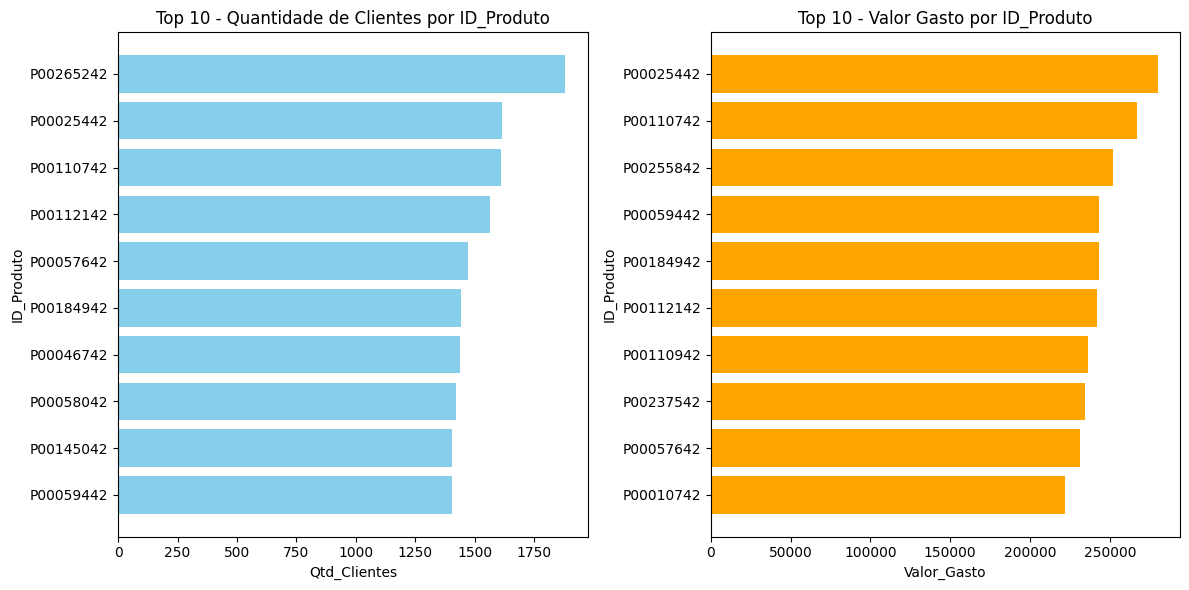

In [90]:
# Ordenar o DataFrame pelo Valor_Gasto em ordem decrescente
df_ordenado_Valor_Gasto = df_bf_sm_produto.sort_values(by='Valor_Gasto', ascending=False)

# Ordenar o DataFrame pelo Qtd_Clientes em ordem decrescente
df_ordenado_Qtd_Clientes = df_bf_sm_produto.sort_values(by='Qtd_Clientes', ascending=False)

# Selecionar os 10 melhores produtos por Valor Gasto e por Qtd Clientes
df_top_10_Valor_Gasto = df_ordenado_Valor_Gasto.head(10)

df_top_10_Qtd_Clientes = df_ordenado_Qtd_Clientes.head(10)

# Criar gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barra horizontal para Qtd_Clientes
axs[0].barh(df_top_10_Qtd_Clientes['ID_Produto'], df_top_10_Qtd_Clientes['Qtd_Clientes'], color='skyblue')
axs[0].set_xlabel('Qtd_Clientes')
axs[0].set_ylabel('ID_Produto')
axs[0].set_title('Top 10 - Quantidade de Clientes por ID_Produto')

# Gráfico de barra horizontal para Valor_Gasto
axs[1].barh(df_top_10_Valor_Gasto['ID_Produto'], df_top_10_Valor_Gasto['Valor_Gasto'], color='orange')
axs[1].set_xlabel('Valor_Gasto')
axs[1].set_ylabel('ID_Produto')
axs[1].set_title('Top 10 - Valor Gasto por ID_Produto')


# Inverter a ordem dos eixos y para que o maior produto apareça primeiro
axs[0].invert_yaxis()
axs[1].invert_yaxis()

# Ajustar o layout
plt.tight_layout()
plt.show()

Neste gráfico, conseguimos analisar facilmente quais são os produtos que possuem mais consumidores e quais geram maior faturamento para a companhia.

##Pré-processamento de Dados

Neste tópico, vamos realizar algumas operações de limpeza, tratamento e preparação dos dados.

É importante relembrar que já fizemos o tratamento de dados faltantes nos tópicos anteriores.


Aqui, vamos utilizar nosso dataframe agrupado por cliente, para iniciar o processo de Machine Learning envolvendo problema de regressão, onde a partir de características dos clientes, queremos prever qual será o valor gasto por eles.

In [91]:
# apresentando DataFrame novamente

df_bf_sm_agrupado.head(10)

,ID_Cliente,Gênero,Faixa Etária,Ocupação,Categoria da Cidade,Anos na Cidade,Estado Civil,Faixa Etária - Numerico,Categoria da Cidade - Numerico,Anos na Cidade - Numerico,Qtd Produtos Distintos,Qtd Categorias Distintas,Valor Gasto
0,1000001,F,0-17,10,A,2,0,0,3,2,35,11,3340.93
1,1000002,M,55+,16,C,4+,0,55,1,4,77,6,8104.72
2,1000003,M,26-35,15,A,3,0,26,3,3,29,6,3416.35
3,1000004,M,46-50,7,B,2,1,46,2,2,14,2,2064.68
4,1000005,M,26-35,20,A,1,1,26,3,1,106,12,8210.01
5,1000006,F,51-55,9,A,1,0,51,3,1,47,10,3799.30
6,1000007,M,36-45,1,B,1,1,36,2,1,17,4,2346.68
7,1000008,M,26-35,12,C,4+,1,26,1,4,77,7,7965.93
8,1000009,M,26-35,17,C,0,0,26,1,0,58,9,5940.99
9,1000010,F,36-45,1,B,4+,1,36,2,4,223,14,21695.10


Vamos reduzir nosso dataframe, deixando apenas os atributos que iremos utilizar em nosso modelo

In [92]:
df_bf_sm_agrupado = df_bf_sm_agrupado[['Gênero', 'Faixa Etária', 'Categoria da Cidade', 'Estado Civil', 'Valor Gasto']]

In [93]:
df_bf_sm_agrupado.head(10)

,Gênero,Faixa Etária,Categoria da Cidade,Estado Civil,Valor Gasto
0,F,0-17,A,0,3340.93
1,M,55+,C,0,8104.72
2,M,26-35,A,0,3416.35
3,M,46-50,B,1,2064.68
4,M,26-35,A,1,8210.01
5,F,51-55,A,0,3799.30
6,M,36-45,B,1,2346.68
7,M,26-35,C,1,7965.93
8,M,26-35,C,0,5940.99
9,F,36-45,B,1,21695.10


Primeiramente, vamos separar nossa base em x e y, onde x são nosssos atributos e y nosso target.

Posteriormente, vamos separar nosso dataset em treino e teste, para evitar o data leakage.

In [94]:
# separando o array em componentes de input e output
X = df_bf_sm_agrupado.values[:,0:4]
y = df_bf_sm_agrupado.values[:,4]

In [95]:
# separando o dataset em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, random_state = 42)

In [96]:
X_treino

array([['M', '18-25', 'A', 0],
       ['M', '18-25', 'C', 1],
       ['M', '26-35', 'B', 1],
       ...,
       ['F', '26-35', 'A', 0],
       ['M', '18-25', 'C', 0],
       ['F', '55+', 'C', 1]], dtype=object)


Para nosso atributo Faixa Etária, vamos aplicar a transformação ordinal, já que seus valores possuem uma ordem implícita.

Para os demais atributos, vamos aplicar o One-Hot enconding.


In [97]:

# Transformação ordinal para a coluna 'Faixa Etária'
faixa_etaria_ordem = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
ordinal_encoder = OrdinalEncoder(categories=[faixa_etaria_ordem], dtype=int)
df_bf_sm_agrupado['Faixa Etária'] = ordinal_encoder.fit_transform(df_bf_sm_agrupado[['Faixa Etária']])

# Codificação one-hot para as colunas 'Gênero', 'Categoria da Cidade'
df = pd.get_dummies(df_bf_sm_agrupado, columns=['Gênero', 'Categoria da Cidade',], drop_first=True)

In [98]:
df.head(10)

,Faixa Etária,Estado Civil,Valor Gasto,Gênero_M,Categoria da Cidade_B,Categoria da Cidade_C
0,0,0,3340.93,0,0,0
1,6,0,8104.72,1,0,1
2,2,0,3416.35,1,0,0
3,4,1,2064.68,1,1,0
4,2,1,8210.01,1,0,0
5,5,0,3799.30,0,0,0
6,3,1,2346.68,1,1,0
7,2,1,7965.93,1,0,1
8,2,0,5940.99,1,0,1
9,3,1,21695.10,0,1,0


Acima mostramos como ficaria o Dataset após a aplicação da transformação ordinal e do One-Hot, para então podermos aplicar um modelo de regrssão em nosso dataset.

## Conclusão

Analisando nossa base de dados, conseguimos conhecer um pouco sobre os consumidores da empresa "ABC".

Com a construção dos gráficos e análises, conseguimos identificar o perfil da maioria de nossos clientes: **Homens, com idade entre 26-35 anos, Solteiros, que moram há 1 ano em Cidade de Categoria C**.

Essa base nos permite realizar infinita análises e abre um leque muito grande para construção de modelos de Machine Learning, seja Supervisionado (Como modelo de Regressão) e Não Supervisionado (Como modelo de clusterização ou assossiação).

A maior dificuldade na elaboração do MVP foi realizar as construções das visualizações em python, uma vez que venho trabalhando há alguns anos com ferramentas de visualização de dados como Power BI e Qlik.

Dito isto, essa é minha última sprint da Pós-Graduação e me sinto muito grato por todo conhecimento e trocas realizadas ao longo de todo curso.

Muito obrigado!